<a href="https://colab.research.google.com/github/insight2action/experiments/blob/main/Fun_with_Pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Estimating $\pi$ is fun



In [2]:
import numpy as np
import matplotlib.pyplot as plt

Consider a square with side length $x$, and an inscribed circle with radius $\frac{x}{2}$ that fits entirely within the square, as in the figure below. 

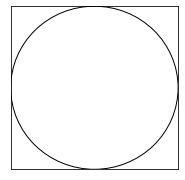

In [11]:
figure, axes = plt.subplots(figsize=(3, 3))
c = plt.Circle((0, 0), 1, fill = False)

plt.xlim(-1,1)
plt.ylim(-1,1)

axes.add_patch(c)
axes.set_yticks([])
axes.set_xticks([])
plt.show()

The area of the square $A_s = x^2$, while the area of the inscribed circle is $A_c = \pi (\frac{x}{2})^2$.

Consider the ratio 

$$
\rho = \frac{A_c}{A_s} = \frac{\pi (\frac{x}{2})^2}{x^2} = \frac{pi}{4}
$$

This identity can then be written as:

$$
 4 \rho = \pi
$$

If we can estimate the ratio $\rho = \frac{A_c}{A_s}$, we can compute an estimate for $\pi$. 

Monte Carlo integration is a method for performing numerical integration using random numbers. If you randomly place points inside the square, some will end up inside the circle while some will not. $\rho$ can then be estimated as the percentage of points in the square that are also in the circle.  s 

In [13]:
n_points = 10000

#first, lets randomly generate n_points inside the square around the origin

x = np.random.uniform(-1, 1, n_points)
y = np.random.uniform(-1, 1, n_points)

`incircle` is a list of booleans values. For the $i^{th}$ point $(x_i, y_i)$:

* `incircle[i]` = `True` means that this point is inside the circle of radius 1
*  `incircle[i]` =  `False` means that the point is outside the circle. 

In [14]:
incircle = [x*x + y*y <=1]

`pi_guesses` is an array that holds the estimate of $\pi$ at each iteration. First, we find the cumulative number of points inside the circle, then mulitply that by the the ratio of 4 to the total number of points at iteration $i$. 

In [79]:
pi_guesses = incircle.cumsum()

pi_guesses = 4 * pi_guesses/np.ones(n_points).cumsum()

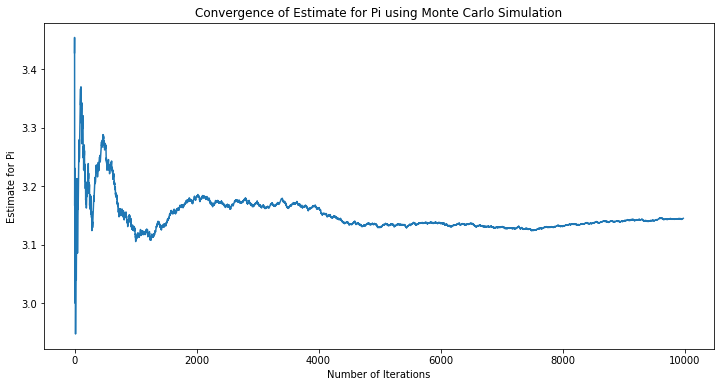

In [80]:
plt.figure(figsize=(12, 6))

plt.plot(pi_guesses[20:])
plt.title("Convergence of Estimate for Pi using Monte Carlo Simulation")
plt.xlabel("Number of Iterations")
plt.ylabel("Estimate for Pi")
plt.show()

In [82]:
print("Our estimate of pi is", pi_guesses[-1]) 

Our estimate of pi is 3.1452
